# Working in SymPy

`SymPy` is a package for symbolic manipulation of expressions, equations, and calculus. The [website](https://docs.sympy.org/latest/index.html) for `SymPy` has tutorials explaining how things work. You can also use the `help()` and `dir()` functions to explore the properties of the `SymPy` package.

The way it is structured is that the different mathematical objects are defined with capital letters (e.g. `Symbol`, `Function`, `Matrix`) while the functions and utilities are defined with lower-case leading letters (e.g. `simplify`, `dsolve`).

### 1. **Basic Operations**

- `symbols()`: Define symbolic variables for expressions.
- `subs()`: Substitute values or expressions for variables.
- `sympify()`: Convert strings or Python objects to SymPy expressions.
- `evalf()`: Evaluate expressions to floating-point numbers.
- `lambdify()`: Convert symbolic expressions to numerical functions (supports backends like NumPy and SciPy).


### 2. **Simplifying Expressions**

- `simplify()`: Simplify general expressions (algebraic, trigonometric, etc.).
- `expand()`: Expand an expression (e.g., expand a polynomial or product).
- `factor()`: Factor expressions (e.g., factor a polynomial).
- `collect()`: Collect like terms in an expression.
- `apart()`: Partial fraction decomposition of rational expressions.
- `cancel()`: Cancel common factors in a rational function.
- `trigsimp()`: Simplify trigonometric expressions.
- `logcombine()`: Combine logarithmic terms into a single expression.
- `powsimp()`: Simplify powers and exponents.


### 3. **Calculus**

#### 3.1 Derivatives
- `diff()`: Compute derivatives of expressions (supports higher-order derivatives).

#### 3.2 Integrals
- `integrate()`: Compute symbolic integrals (both definite and indefinite).
- `integrate(f, (var, a, b))`: Compute definite integrals over an interval.
  
#### 3.3 Limits
- `limit()`: Compute the limit of an expression as a variable approaches a value.

#### 3.4 Series
- `series()`: Expand a function in a Taylor or Laurent series around a point.


### 4. **Linear Algebra**

- `Matrix()`: Define symbolic matrices.
- `det()`: Compute the determinant of a matrix.
- `inv()`: Compute the inverse of a matrix.
- `eigenvals()`: Compute eigenvalues of a matrix.
- `eigenvects()`: Compute eigenvectors of a matrix.
- `solve_linear_system()`: Solve a system of linear equations.
- `transpose()`: Transpose a matrix.
- `rref()`: Compute the reduced row echelon form of a matrix.


### 5. **Differential Equations**

- `dsolve()`: Solve ordinary differential equations (ODEs).
- `Function()`: Define a function that represents the solution of a differential equation.
- `Eq()`: Set up an equation (useful for defining differential equations).
- `classify_ode()`: Classify an ODE to determine its solution method.
- `checkodesol()`: Check whether a solution satisfies a given differential equation.


### 6. **Solving Equations**

- `solve()`: Solve algebraic equations (returns roots or solutions).
- `nonlinsolve()`: Solve systems of nonlinear equations.
- `linsolve()`: Solve systems of linear equations.
- `solvers.solvers.solve()`: A more general solver for symbolic equations.
- `solvers.decomp_ineq()`: Decompose inequalities for solving them.


### 7. **Polynomials**

- `Poly()`: Create a polynomial object for more control over polynomials.
- `degree()`: Get the degree of a polynomial.
- `roots()`: Find the roots of a polynomial.
- `gcd()`: Compute the greatest common divisor of polynomials.
- `lcm()`: Compute the least common multiple of polynomials.


### 8. **Trigonometry**

- `sin()`, `cos()`, `tan()`: Basic trigonometric functions.
- `asin()`, `acos()`, `atan()`: Inverse trigonometric functions.
- `expand_trig()`: Expand trigonometric expressions (e.g., using angle addition formulas).
- `trigsimp()`: Simplify trigonometric expressions.
- `rewrite()`: Rewrite trigonometric functions in terms of other functions (e.g., rewrite `sin(x)` in terms of exponential functions).


### Here's an example of how to solve a quadratic equation

In [1]:
import sympy as sp

# Define the symbolic variables
a, b, c, x = sp.symbols('a b c x')

# Define the quadratic equation: ax^2 + bx + c = 0
quadratic_eq = sp.Eq(a*x**2 + b*x + c, 0)

# Solve the quadratic equation for x
solutions = sp.solve(quadratic_eq, x)

# Display the solutions
solutions


[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

### Here's an example of how to solve a differential equation

In [1]:
import sympy as sp

# Define the symbolic variables and function
x, x0, y0, a, b = sp.symbols('x x0 y0 a b')  # Independent variable, constants, initial condition
y = sp.Function('y')(x)  # Dependent variable y as a function of x

# Define the first-order differential equation: a*y' + b*y = 0
diff_eq = sp.Eq(a * y.diff(x) + b * y, 0)

# Solve the differential equation
general_solution = sp.dsolve(diff_eq, y)

# Extract the solution for y(x)
solution_y = general_solution.rhs

# Apply the initial condition: y(x0) = y0
initial_condition = sp.Eq(solution_y.subs(x, x0), y0)

# Solve for the constant C1
C1_value = sp.solve(initial_condition, sp.symbols('C1'))[0]

# Substitute C1 back into the general solution
solution_with_ic = general_solution.subs(sp.symbols('C1'), C1_value)

# Display the solution with initial conditions
solution_with_ic


Eq(y(x), y0*exp(-b*x/a)*exp(b*x0/a))

## Assignment (1): Use `SymPy` to test the solutions we derived in class last week. 



$Q_{tr} = A cos(\omega_\gamma t) + B sin(\omega_\gamma t)$

and 

$Q_{st} = \bar{C} cos(\omega t - \phi)$

where

$\omega_\gamma = {\sqrt{\omega_0^2 - \gamma^2}}$,

$\bar{C} = \frac{F_0/m}{\sqrt{(\omega_0^2-\omega^2)^2-4\gamma^2\omega^2}}$,

and

$\phi = \frac{2\gamma\omega}{\omega_0^2-\omega^2}$


## Check that

$Q_{tr} = A cos(\omega_\gamma t) + B sin(\omega_\gamma t)$

with 

$\omega_\gamma = {\sqrt{\omega_0^2 - \gamma^2}}$

is a solution to

$\ddot{Q} + 2 \gamma \dot{Q} + \omega_0^2 Q = 0$

In [12]:
# importing modules/libraries --> SymPy
import sympy as sp


In [24]:
# define needed variables
A, B, omega_0, omega_gamma, gamma, t = sp.symbols("A, B, omega_0, omega_gamma, gamma, t",real=True)
Q = sp.Function("Q")(t)


# define the differential equation as, left hand side = zero when F0=0
diff_eq_ref = sp.diff(Q,t,2) + 2*gamma*sp.diff(Q,t,1) + omega_0**2*Q

# define the "guess" for solution
Q_tr_guess = sp.exp(-gamma*t)*( A*sp.cos(omega_gamma*t) + B*sp.sin(omega_gamma*t) ) 

#define omega_gamma
omega_gamma_expr = sp.sqrt(omega_0**2 - gamma**2)

# plug in solution into the differential; includes taking derivatives
diff_eq_test = sp.diff(Q_tr_guess,t,2) + 2*gamma*sp.diff(Q_tr_guess,t,1) + omega_0**2*Q_tr_guess

#diff_eq_test.simplify()
test_result = diff_eq_test.subs(omega_gamma, omega_gamma_expr).simplify().is_zero
test_result

True

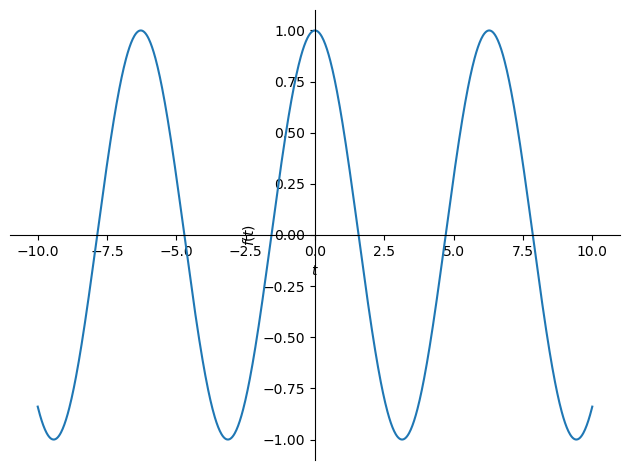

In [25]:
sp.plot(sp.cos(t))

## Deriving the steady state solution to damped driven harmonic oscillator

We need to solve

$\ddot{Q} + 2\gamma \dot{Q} + \omega_0^2 Q = (F_0/m) e^{i\omega t}$

with 

$Q = C e^{i\omega t}$

In [ ]:
# import modules/packages
# define variables & functions
# define differential equation
# define guess for solution
# plug in guess
# solve for C
# find the real part of solution
# plug real into diff eqn
# test alternative, analytic form of solution



## Assignment (2): Create representative plots of $\bar{C}$ and $\phi$ 


In [39]:
#import sympy as sp
#sp.symbols()
#sp.Function()
#help(sp.Eq)

In [1]:
# import modules/packages
import sympy as sp

# define variables & functions
omega, omega_0, gamma, t, F_0, m = sp.symbols("omega, omega_0, gamma, t, F_0, m",real=True)
C = sp.symbols("C", complex=True)
Q = sp.Function("Q")(t)
F = sp.Function("F")(t)

# define differential equation
diff_eq_ref = sp.Eq(
    sp.diff(Q,t,2) + 2*gamma*sp.diff(Q,t,1) + omega_0**2*Q, #Left hand side
    F/m #right hand
)

# define guess for solution
Q_st_guess = C*sp.exp(sp.I*omega*t)
drive_expr = (F_0/m) *sp.exp(sp.I*omega*t)
drive_real = sp.re(drive_expr)

# plug in guess
diff_eqn_guess = sp.Eq(
    sp.diff(Q_st_guess,t,2) + 2*gamma*sp.diff(Q_st_guess,t,1) + omega_0**2*Q_st_guess,
    drive_expr
)

# solve for C
C_sol = sp.solve(diff_eqn_guess, C)[0]


# find the real part of solution
Q_sol = sp.re(
    sp.expand_complex(C_sol*sp.exp(sp.I*omega*t)).simplify()
)

# plug real into diff eqn
sp.Eq(
    sp.diff(Q_sol,t,2) + 2*gamma*sp.diff(Q_sol,t,1) + omega_0**2*Q_sol, #Left hand side
    drive_real #right hand
).simplify()

# test alternative, analytic form of solution


True